In [2]:
#Objective- To build a Supervised Machine Learning Model using OneVsRest Multiclass Classification

# Dependencies- 
# 1. Numpy
# 2. Scikit Learn
# 3. Matplotlib 



In [3]:
# Fetching the data using Sklearn API
# We fetch the data in the form of numpy array
# MNIST data: Collection of 70,000 greyscale images under 10 categories each of 28x28 
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784', as_frame=False)
# load data into variables 
x=mnist.data # data
y=mnist.target#label
z=mnist.DESCR #description

In [4]:
mnist.data[0], mnist.target[0]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

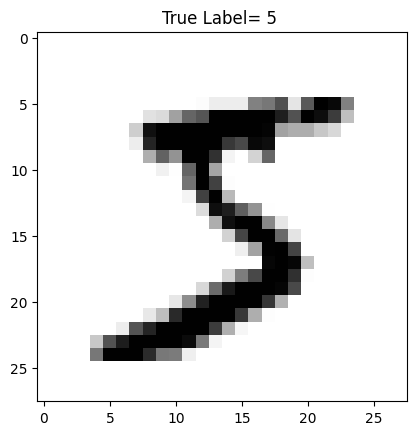

In [5]:
# Visualizing data 
%matplotlib inline
import matplotlib.pyplot as plt

def plot_digit(x,y, index):
    image= x[index].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.title('True Label= %s '%y[index])
    plt.show()
plot_digit(x,y,0)

In [6]:
# We have dataset to train our model
# we will not split data into training and testing data 
# because we do not want our model to be biased that's why the dataset used in training should be different 
# from the dataset that is used to test the model 

# we put 80% data as training and 20% as testing dataset


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(mnist.data, mnist.target, test_size=0.3)

In [8]:
len(x_train)

49000

In [9]:
len(x_test)

21000

In [10]:
# Now implementing the model - OneVsRest Classification Model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr_model= OneVsRestClassifier(SVC(random_state=42)) #creating a model object 
ovr_model.fit(x_train, y_train) #Training the model with the training data

OneVsRestClassifier(estimator=SVC(random_state=42))

In [11]:
#checking the accuracy of model 
ovr_model.score(x_test[:2000], y_test[:2000])

0.9765

In [17]:
# pick a random sample and check whether model is predicting right or not 
# plot_digit(x,y,45)
y[45]

'9'

In [19]:
ovr_model.predict([mnist.data[45]])

array(['9'], dtype='<U1')

In [ ]:
#so model is working correctly

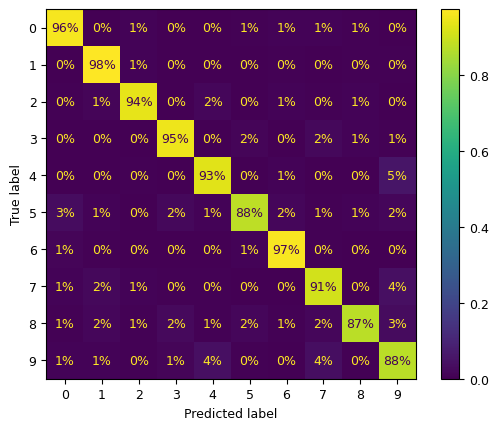

In [24]:
# Confusion Matrix (True Label versus Predicted Label) - Analysing the model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
# y_train_pred = predicted label and y_train=true label
y_train_pred= cross_val_predict(ovr_model, x_train[:2000], y_train[:2000], cv=3) 
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [34]:
ovr_model.predict([mnist.data[2]])

array(['4'], dtype='<U1')

In [33]:
import pickle
filename='final_model.sav'
pickle.dump(ovr_model, open(filename, 'wb'))